In [36]:
import sys

# Install a pip package in the current Jupyter kernel
!{sys.executable} -m pip install textblob
!{sys.executable} -m pip install vaderSentiment
!{sys.executable} -m pip install jellyfish
!{sys.executable} -m pip install langdetect
!{sys.executable} -m pip install spacy

!python3 -m spacy download en_core_web_sm
!{sys.executable} -m pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz
!python3 -m textblob.download_corpora

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     |████████████████████████████████| 13.7 MB 4.7 MB/s eta 0:00:01    |███████████████████████▏        | 9.9 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.1 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 6.3 MB/s  eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-3.0.0-py3-none-any.whl size=13704321 sha256=ec1b81a5758e068ad102e4028716c66c64ec4ab066b9288da5f33bb60595fda3
  Stored in directory: /Users/artem/Library/Caches/pip/wheels/88/16/62/706709a80d48c983fffc44547114a933c464cd032e19378fb2
Successfully built en-core-web-sm
  Attempting uninstall: click
    Found exi

[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/artem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/artem/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/artem/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/artem/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7, 6

from copy import deepcopy
import seaborn as sns

import sys
sys.path.append('./utils')
from utils import review_feature
rf = review_feature()
%matplotlib inline

/Users/artem/opt/anaconda3/lib/python3.9/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [38]:
!ls data

ls: data: No such file or directory


In [40]:
df = pd.read_csv('../data/train.csv')

In [41]:
df

product                                      answer_option  label
0     Accucheck                         Fast and accurate delivery      0
1     Accucheck                            As usual it is genuine       0
2     Accucheck  Behavior of delivery boy is very bad. Delivery...      0
3     Accucheck                                     fwegwrqdsdvwfg      0
4     Accucheck             These strips were as per my requirment      0
...         ...                                                ...    ...
1671  Accucheck                                              Ft GM      0
1672  Accucheck                                             I like      0
1673  Accucheck                        Nice price with long expiry      0
1674  Accucheck                                    Price & Service      0
1675  Accucheck                                      Good discount      0

[1676 rows x 3 columns]

## Analysis to understand per product who many informative and how many not informative reviews are there. 

In [42]:
label_analysis = pd.crosstab(df['product'],df['label'], margins='All')
label_analysis

label                    0    1   All
product                              
Accucheck              317   85   402
Becadexamin             53   27    80
Evion                   89   33   122
Neurobion              286  137   423
SevenseascodLiverOil    60   22    82
Shelcal                262  126   388
Supradyn                50   23    73
shampoo                 57   49   106
All                   1174  502  1676

<AxesSubplot:xlabel='product'>

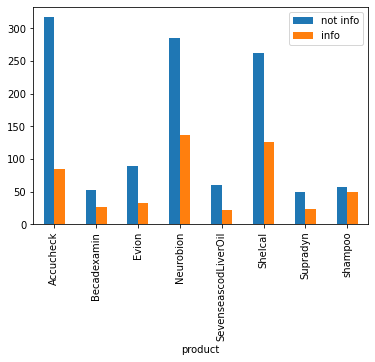

In [43]:
analysis = label_analysis.reset_index()
analysis.columns = ['product','not info', 'info', 'All']
analysis.iloc[:-1].plot(x="product", y=["not info", "info"], kind="bar")

## Lets check the length quality of reviews we have?

In [44]:
df['review_len'] = df['answer_option'].apply(lambda x: len(x.split()))

In [45]:
df

product                                      answer_option  label  \
0     Accucheck                         Fast and accurate delivery      0   
1     Accucheck                            As usual it is genuine       0   
2     Accucheck  Behavior of delivery boy is very bad. Delivery...      0   
3     Accucheck                                     fwegwrqdsdvwfg      0   
4     Accucheck             These strips were as per my requirment      0   
...         ...                                                ...    ...   
1671  Accucheck                                              Ft GM      0   
1672  Accucheck                                             I like      0   
1673  Accucheck                        Nice price with long expiry      0   
1674  Accucheck                                    Price & Service      0   
1675  Accucheck                                      Good discount      0   

      review_len  
0              4  
1              5  
2             20  
3              1  
4              7  
...          ...  
1671           2  
1672           2  
1673           5  
1674           3  
1675           2  

[1676 rows x 4 columns]

In [46]:
checklen = []
for i in range(5,50, 5):
    checklen.append(len(df[ (df['review_len']>=i-5) & (df['review_len']<i)]))

In [47]:
checklen

[780, 603, 149, 65, 29, 22, 9, 6, 3]

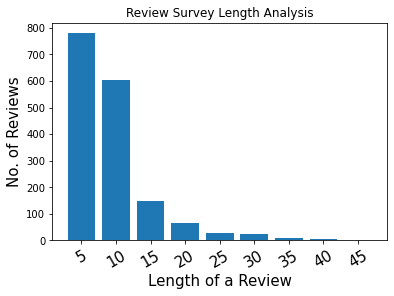

In [48]:
index = np.arange(len(checklen))
plt.bar(index, checklen)
plt.xlabel('Length of a Review', fontsize=15)
plt.ylabel('No. of Reviews', fontsize=15)
plt.xticks(index, range(5,50,5), fontsize=15, rotation=30)
plt.title('Review Survey Length Analysis')
plt.show()

## We have a fair amount of both details reviews (having length >=5) and short reviews (having length <5)

## Data Preprocessing

![datapreprocessing](../theory/datapreprocessing.png)

## Stage1: Language Detection

In [49]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'answer_option']
    try:
        b = rf.language_detection(review)
        if b == 'hi' or b == 'mr':
            bad_reviews.append(indx)
    except:
        bad_reviews.append(indx)
        print("Language exception for:", review)

Language exception for: 😕🤔😕🤣😕🤣😢😨😔😭😃😁😣😨😁🤦‍♂️😨☺😣😔😨😛🤦‍♂️😢☺👍🙈😨😕😔😊😢😕😔🙈😨😣🤦‍♂️👍😁🤦‍♂️🙈😁🤦‍♂️😂😕😔😊😨👍😂😢👍😂🙈😢👍😂😭👍😂😭😕🙈👍😕😂☺😕😂😂😣😂😕👍😢😕🤦‍♂️😂😢🤔🙈😕🤦‍♂️🙈😢🤔😂🤦‍♂️🙈🤔😔😣😣👆🙈🤔😔😕😕😨🤣😔😕🙈😊😨😣😣🙈😊😕😂🤔😕😢🤔👍🤣😨😕😭😨😕😭😨😕😭😕👍😭😕😕🤣👍😁😭👍👍😭😕😣🙈😕😣😢😣😣😨😣😛😨😭😣😢😭😨😛😨🤣😢😨😂😊🤔😊🙈🙈🙈😭🐂🐎🐷🐎🐂🐈🐱🐮🦓🐱🐄🦌🦔🌹🥀⚘🌸🏵🌲🌷🌸⚘🌱🥔🍑🍓🍆🥝🍐🥑🥕🍆🍏🥝🍓🥔🥝🍆🥔🥑🥝🥝🥝🍒🥔🥑🥝🍏🍏🥑🥔🍐🍏🥑🥔🥔🥔🍆🍏🍏🍓🍇🥕🍏🍓🍏🍓🍏🥔🍐🍐🥔🍐🥔🥔🍐🥔🥑🍓🍏🍓🥝🍓🥑🍓🥑🍓🥑🥕🍐🥕🍏🍓🍇🍑🍈🥑🍇🥑🍏🍍🥑🍓🍏🍓🍇🍆🍎🥔🥝🍓🍐🍒🍇🍓🥑🍌🍏🍆🥝🍆🥝🍆🍏🍓🥑🍓🍎🍄🥝🍒🥥🍒🥝🥔🥦🍓🍆🍅🍏🥔🥝🥕🥑🍓🍏🥔🥝🥔🥝🍓🥘🥙🥘🌮🍕🌮🍕🌯🥘🥚🥩🥓🍖🌯🥘🍟🌭🥓🍳🥓🥪🥚🍖🍗🍕🥙🌭🍔🌭🍿🌭🥙🏌️‍♂️🥋🏓🎳🏓🏏🏓🥅🏌️‍♂️🥊🏌️‍♂️🎳⛳🏏⛳    🤼‍♀️🏍🤼‍♀️🤸‍♂️🤼‍♀️🤾‍♀️🤼‍♂️🏎🤹‍♂️🤺🤼‍♀️🏎🤼‍♂️       🎳🏸🥅🏸🥋🏌️‍♂️🎿🏚🏛🏝🏣🏙🌋🏜🏛🏝         🎙🎤🎶🎧📲🎤🎸📱🎙🎧🎷🎤🎸📻📲🎚🎧🎸🎼🎸📺📷📽📷📽📷📽🔬📽🔬📽🔬    🎸🥁🎙🎤🎚🎧🎸🥁🥁🎸🎤☎️🎸🎻🎸📱🎚🎤🎸🎤☎️🎧🎸🎤🎙🎤🎤☎️📻☎️🎧🎸🎸🎤🎤☎️🎤🎸🎤🎸🎤🎸🎧🎸🎸🎧🎧🎸🎸🎧🎸🎧📻🎸🎸🎧🎧🎸🎧🎸🎧🎸🎤🎸🎤☎️🎧


In [50]:
print("Number of Bad Reviews at Stage 1: ", len(bad_reviews))

Number of Bad Reviews at Stage 1:  3


In [51]:
df[df.index.isin(bad_reviews)]

product                                      answer_option  label  \
898   Neurobion                                           अच्छा है      0   
1042  Neurobion  😕🤔😕🤣😕🤣😢😨😔😭😃😁😣😨😁🤦‍♂️😨☺😣😔😨😛🤦‍♂️😢☺👍🙈😨😕😔😊😢😕😔🙈😨😣🤦‍♂...      0   
1110    Shelcal  साहब बहुत धाँसू गोली है साला मेरा घुटना ख़राब ...      0   

      review_len  
898            2  
1042           5  
1110          23

In [52]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

## Stage 2: Gibberish Reviews
+ When, we collect data from customers just out of frustation many reviews write gibberish reviews. 
+ Example: svfsfg, fsdfgdfgfsgsfgdgh, ffgrthyryj, rhrhfas, kuopip
+ We need to detection such reviews and filter thoses out.

#### Working
You could build a model of character to character transitions from a bunch of text in English. So for example, you find out how common it is for there to be a 'h' after a 't' (pretty common). In English, you expect that after a 'q', you'll get a 'u'. If you get a 'q' followed by something other than a 'u', this will happen with very low probability, and hence it should be pretty alarming. Normalize the counts in your tables so that you have a probability. Then for a query, walk through the matrix and compute the product of the transitions you take. Then normalize by the length of the query. When the number is low, you likely have a gibberish query (or something in a different language).

If you have a bunch of query logs, you might first make a model of general English text, and then heavily weight your own queries in that model training phase.

For background, read about Markov Chains.

Source: https://github.com/rrenaud/Gibberish-Detector

> I have trained a model for and have stored it's pickle file.

In [53]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'answer_option']
    if rf.gibberish_detection(review, prefix_path = 'utils'):
        bad_reviews.append(indx)

In [54]:
print("Number of Bad Reviews at Stage 2: ", len(bad_reviews))

Number of Bad Reviews at Stage 2:  8


In [55]:
bad_reviews

[3, 82, 362, 432, 1449, 1503, 1599, 1668]

In [56]:
df[df.index.isin(bad_reviews)]

product       answer_option  label  review_len
3     Accucheck      fwegwrqdsdvwfg      0           1
82    Accucheck          qwerwetrjy      0           1
362   Neurobion            gehryetw      0           1
432     Shelcal            gehryetw      0           1
1449  Accucheck  ghyukuyujredfehrbv      0           1
1503  Accucheck           VVV. Good      0           2
1599  Accucheck          wqwasdbggn      0           1
1668  Accucheck               Ft GM      0           2

In [57]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

## Stage 3: Profanity Detection

+ At times reviewers are not happy with the delivery or service out of frustration they type profanity words in reviews. 
+ Profanity content also penalises SEO ranking
+ We decided to filter out both english and hinglish profanity reviews. 



In [58]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'answer_option']
    if rf.english_swear_check(review) or rf.hindi_swear_check(review):
        bad_reviews.append(indx)

In [59]:
print("Number of Bad Reviews at Stage 3: ", len(bad_reviews))

Number of Bad Reviews at Stage 3:  3


In [60]:
df[df.index.isin(bad_reviews)]

product                                      answer_option  label  \
140     shampoo                   STOP SENDING ME SMS you assholes      0   
1009  Neurobion                  MotherFucker I dont want anything      1   
1187    Shelcal  SHELLCALL IS TAKEN BYYOU WIFE, BECAUSE SHE HAS...      1   

      review_len  
140            6  
1009           5  
1187          22

In [61]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

## Stage 4: Spelling Correction (Optional Stage not that necessary)
+ Trying to improve quality of reviews which have high confidence spell errors. Like withut -> without

In [64]:
# Optional step (uncomment if you need it)
# for indx in df.index:
#     review = df.at[indx, 'answer_option']
#     df.at[indx, 'answer_option'] = rf.spell_correct(review, 0.9)

## Stage 4.1: Company Tag (Optional Stage)

In [65]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'answer_option']
    if rf.competitive_brand_tag(review):
        bad_reviews.append(indx)

In [66]:
print("Number of Bad Reviews at Stage 4.1: ", len(bad_reviews))

Number of Bad Reviews at Stage 4.1:  7


In [67]:
df[df.index.isin(bad_reviews)]

product                                      answer_option  \
33               Accucheck                         amazon products are better   
348              Neurobion  Almost no discount on OTC products Pharmeasy &...   
444                Shelcal  papal payment method was not working Product w...   
615   SevenseascodLiverOil                                  Cheaper on amazon   
941              Neurobion             Amazon has better quality for products   
1057             Neurobion  Almost no discount on OTC products Pharmeasy &...   
1324               Shelcal                                     grofer is best   

      label  review_len  
33        0           4  
348       0          20  
444       0           9  
615       0           3  
941       0           6  
1057      0          20  
1324      1           3

In [68]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

In [69]:
print("Total Count of Reviews after preprocessing: ", len(df))

Total Count of Reviews after preprocessing:  1655


In [74]:
import os
try:
    os.mkdir('../output')
except:
    pass

df.to_csv('../output/Preprocessed_Reviews.csv',index = False)

# Summary
+ So far, we have done EDA of Data.
+ Preprocessing of reviews in 4 main stages. 

### Initial Count of Reviews was: 1676
### Final Count of Reviews is: 1655

+ We have to be strict with are preprocessing so that no bad content is shown on our website. 
+ By preprocessing we are reducing False positives. 

### Note: You may feel that only 21 reviews are scrapped but when you will be working on full scale then you will observed that about 7-10% of total reviews would be junk.